# Hackathon 2019 - dAIbetes

In [0]:
#Import all of the needed libraries
from __future__ import print_function
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import RandomOverSampler
from joblib import dump, load

In [0]:
#Import the data from my google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Importing and processing the data
data_path = 'drive/My Drive/diabetes.csv'
df = pd.read_csv(data_path)

#Need to clean data as there are some empty values 
#Blood Pressure Values 
bp_mean = df['BloodPressure'].mean()
df['BloodPressure'] = df['BloodPressure'].mask(df['BloodPressure'] == 0, bp_mean)

#Skin Thickness Values 
st_mean = df['SkinThickness'].mean()
df['SkinThickness'] = df['SkinThickness'].mask(df['SkinThickness'] == 0, st_mean)
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.000000,35.000000,0,33.6,0.627,50,1
1,1,85,66.000000,29.000000,0,26.6,0.351,31,0
2,8,183,64.000000,20.536458,0,23.3,0.672,32,1
3,1,89,66.000000,23.000000,94,28.1,0.167,21,0
4,0,137,40.000000,35.000000,168,43.1,2.288,33,1
5,5,116,74.000000,20.536458,0,25.6,0.201,30,0
6,3,78,50.000000,32.000000,88,31.0,0.248,26,1
7,10,115,69.105469,20.536458,0,35.3,0.134,29,0
8,2,197,70.000000,45.000000,543,30.5,0.158,53,1
9,8,125,96.000000,20.536458,0,0.0,0.232,54,1


In [0]:
#Split into male and female data
women_data = df
men_data = df.drop(['Pregnancies'], axis = 1)

women_data.head(10)
#men_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.000000,35.000000,0,33.6,0.627,50,1
1,1,85,66.000000,29.000000,0,26.6,0.351,31,0
2,8,183,64.000000,20.536458,0,23.3,0.672,32,1
3,1,89,66.000000,23.000000,94,28.1,0.167,21,0
4,0,137,40.000000,35.000000,168,43.1,2.288,33,1
5,5,116,74.000000,20.536458,0,25.6,0.201,30,0
6,3,78,50.000000,32.000000,88,31.0,0.248,26,1
7,10,115,69.105469,20.536458,0,35.3,0.134,29,0
8,2,197,70.000000,45.000000,543,30.5,0.158,53,1
9,8,125,96.000000,20.536458,0,0.0,0.232,54,1


In [0]:
#Separate the X and Y columns of the datasets 
x_men = men_data.iloc[:,:7]
y_men = men_data.iloc[:,7]

x_women = women_data.iloc[:,:8]
y_women = women_data.iloc[:,8]

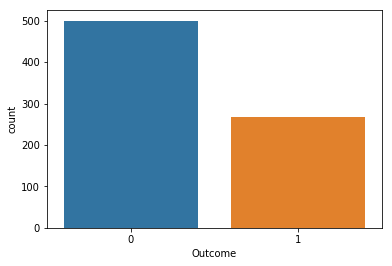

In [0]:
#We now need to oversample the data as there is a skew between the positive and negative outcomes 
pre = sns.countplot(df['Outcome'])

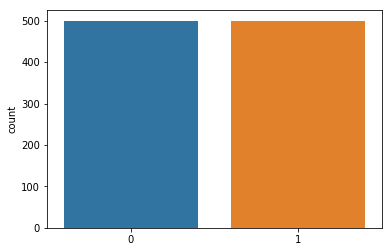

In [0]:
#Define the random oversampler and pass outcomes through it 
sampler = RandomOverSampler()
x_men, y_men = sampler.fit_resample(x_men, y_men)
x_women, y_women = sampler.fit_resample(x_women, y_women)

post = sns.countplot(y_men)

In [0]:
#Split the data
x_men_train, x_men_test, y_men_train, y_men_test = train_test_split(x_men, y_men, test_size = 0.1)
x_women_train, x_women_test, y_women_train, y_women_test = train_test_split(x_women, y_women, test_size = 0.1)

In [0]:
#Build and train the model for women
wom_bin_clf = KNeighborsClassifier(algorithm = 'ball_tree',
                                   weights = 'distance',
                                   leaf_size = 1,
                                   n_neighbors = 5, 
                                   metric = 'manhattan', 
                                   p = 2)

wom_bin_clf.fit(x_women_train, y_women_train)
women_pred = wom_bin_clf.predict(x_women_test)
print(metrics.balanced_accuracy_score(y_women_test, women_pred))

0.7745571658615137


In [0]:
#Build and train the model for men
men_bin_clf = KNeighborsClassifier(algorithm = 'ball_tree',
                                   weights = 'distance',
                                   leaf_size = 1,
                                   n_neighbors = 5, 
                                   metric = 'manhattan', 
                                   p = 2)

men_bin_clf.fit(x_men_train, y_men_train)
men_pred = men_bin_clf.predict(x_men_test)
print(metrics.balanced_accuracy_score(y_men_test, men_pred))

0.8229166666666667


In [0]:
#Define parameters to search along 
parameters = {'n_neighbors': (3,4,5,6,7,8,9,10),
              'weights': ('uniform', 'distance'),
              'algorithm': ('ball_tree', 'kd_tree', 'brute'),
              'leaf_size': (1,2,3,4,5), 
              'p': (1,2),
              'metric': ('euclidean', 'manhattan', 'chebyshev', 'minkowski'),
              }

#Define the grid search
gs_clf = GridSearchCV(men_bin_clf, parameters, verbose = 10, cv = 5)

#Train on the gridsearch to find the best values 
gs_clf.fit(x_men_train, y_men_train)

# Display the results
print("Best score: {}".format(gs_clf.best_score_))
print("Paremters used: {}".format(gs_clf.best_params_))

In [0]:
#Predictions and their associated probabilities
#Build test dataframe
df1 = df.drop(['Outcome'], axis = 1)
col = list(df1.columns)
test_df = pd.DataFrame([[10,197,96,40,175,32,1.5,64],[0,68,57,15,0,14,0.134,30]], columns = col)
test_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,10,197,96,40,175,32,1.500,64
1,0,68,57,15,0,14,0.134,30


In [0]:
#Perform predictions on the test data 
#Positive prediction
x = test_df.iloc[0,:]
x = np.array(x)
print(wom_bin_clf.predict(x.reshape(1, -1)), wom_bin_clf.predict_proba(x.reshape(1,-1)))

[1] [[0. 1.]]


In [37]:
rfc = RandomForestClassifier()
rfc.fit(x_women_train, y_women_train)
pred = rfc.predict(x_women_test)
print(metrics.balanced_accuracy_score(y_women_test, pred))

0.833608929309632


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
#Negative Prediction
x = test_df.iloc[1,:]
x = np.array(x)
wom_bin_clf.predict(x.reshape(1, -1))
wom_bin_clf.predict_proba(x.reshape(1,-1))

array([[1., 0.]])

In [0]:
#Export both models to be recalled 
dump(men_bin_clf, 'men_bin_clf.joblib')
dump(wom_bin_clf, 'wom_bin_clf.joblib')
dump(rfc, 'rfc.joblib')

['rfc.joblib']